In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# importing necessary libraries for the 'Water Allocation Price Prediction' model development project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

In [3]:
# reading the water market transactions data for Goulburn
data_Goulburn_Goulburn_Murray = pd.read_csv('data_Goulburn_Goulburn_Murray.csv')

In [4]:
# displaying the data
data_Goulburn_Goulburn_Murray

,Total Traded Volume (ML),Volume Weighted Average Price ($),Date
0,491.0,2078.289165,2009-05-01
1,4281.8,816.759308,2009-06-01
2,18113.1,2328.518173,2009-07-01
3,5853.9,1256.423555,2009-08-01
4,7231.8,2344.605215,2009-09-01
...,...,...,...
175,3961.4,2651.322289,2023-12-01
176,1808.4,3215.754248,2024-01-01
177,1682.5,2726.564636,2024-02-01
178,3670.9,3976.780217,2024-03-01


In [5]:
# dividing the new dataset into two sub-sets
X = data_Goulburn_Goulburn_Murray['Total Traded Volume (ML)']
y = data_Goulburn_Goulburn_Murray['Volume Weighted Average Price ($)']

# generating training and testing datasets
X_train, X_test, y_train_1, y_test = train_test_split(X, y, test_size = 0.9, shuffle = True)

# converting training and testing datasets for regression analysis into arrays
X_train  = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train_1 = np.array(y_train_1).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# displaying shapes of training and test datasets
X_train.shape, y_train_1.shape, X_test.shape, y_test.shape

((18, 1), (18, 1), (162, 1), (162, 1))

In [6]:
# creating an input layer for a deep neural network in an attempt to capture non-linear relationship between the variables of interest
input_layer = Input(shape = (X_train.shape[1], ))

# creating five Dense layers, each with 128 units, to capture non-linear relationship between the varibales of interest
hidden_1 = Dense(128, activation = 'relu')(input_layer)
hidden_2 = Dense(128, activation = 'relu')(hidden_1)
hidden_3 = Dense(128, activation = 'relu')(hidden_2)
hidden_4 = Dense(128, activation = 'relu')(hidden_3)
hidden_5 = Dense(128, activation = 'relu')(hidden_4)

# creating an output layer with a single unit and the 'linear' activation function since a regression problem is under consideration
output_layer = Dense(1, activation = 'linear')(hidden_5)

# creating a model of the above structure for a deep neural network 
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [7]:
# displaying the model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129   

In [8]:
# choosing an optimizer, loss function and a performance metric to comppile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), 
              loss = tf.keras.losses.MeanSquaredError(), 
              metrics = tf.keras.metrics.MeanSquaredError())

In [9]:
# number of epochs and batch size to train the model
epochs = 1000
batch_size = 1

# training the neural network with two hidden layers and recording the training history for further analysis
model_training = model.fit(X_train, y_train_1, epochs = epochs, batch_size = batch_size, verbose = 0)

train_predictions_1 = model.predict(X_train)

In [10]:
# converting the setting the 'Approved / Refused Data' column to the 'datetime' format 
data_Goulburn_Goulburn_Murray["Date"] = pd.to_datetime(data_Goulburn_Goulburn_Murray["Date"], format = '%Y/%m/%d')

In [11]:
# modifying the current datetime format of the 'Date' and formatting it separately as years and months
data_Goulburn_Goulburn_Murray["Year"] = data_Goulburn_Goulburn_Murray["Date"].dt.year
data_Goulburn_Goulburn_Murray["Month"] = data_Goulburn_Goulburn_Murray["Date"].dt.month

In [12]:
# displaying the modified data to clearly see the changes made
data_Goulburn_Goulburn_Murray

,Total Traded Volume (ML),Volume Weighted Average Price ($),Date,Year,Month
0,491.0,2078.289165,2009-05-01,2009,5
1,4281.8,816.759308,2009-06-01,2009,6
2,18113.1,2328.518173,2009-07-01,2009,7
3,5853.9,1256.423555,2009-08-01,2009,8
4,7231.8,2344.605215,2009-09-01,2009,9
...,...,...,...,...,...
175,3961.4,2651.322289,2023-12-01,2023,12
176,1808.4,3215.754248,2024-01-01,2024,1
177,1682.5,2726.564636,2024-02-01,2024,2
178,3670.9,3976.780217,2024-03-01,2024,3


In [13]:
# extracting processed transaction data only for months of June (6), July (7), and August (8)
data_Goulburn_Goulburn_Murray_season_3 = data_Goulburn_Goulburn_Murray[data_Goulburn_Goulburn_Murray["Month"].between(6, 8)]

In [14]:
# displaying the modified data to clearly see the changes made
data_Goulburn_Goulburn_Murray_season_3.head()

,Total Traded Volume (ML),Volume Weighted Average Price ($),Date,Year,Month
1,4281.8,816.759308,2009-06-01,2009,6
2,18113.1,2328.518173,2009-07-01,2009,7
3,5853.9,1256.423555,2009-08-01,2009,8
13,5262.5,1371.477027,2010-06-01,2010,6
14,16217.2,2107.343147,2010-07-01,2010,7


In [15]:
# removing the previous date information from the new dataset after creating a new date feature
data_Goulburn_Goulburn_Murray_season_3 = data_Goulburn_Goulburn_Murray_season_3.drop(['Year'], axis = 1)
data_Goulburn_Goulburn_Murray_season_3 = data_Goulburn_Goulburn_Murray_season_3.drop(['Month'], axis = 1)

# setting the date feature of the dataset as an index
data_Goulburn_Goulburn_Murray_season_3.set_index('Date', inplace = True)

In [16]:
# displaying the modified data to clearly see the changes made
data_Goulburn_Goulburn_Murray_season_3.head()

,Total Traded Volume (ML),Volume Weighted Average Price ($)
Date,,
2009-06-01,4281.8,816.759308
2009-07-01,18113.1,2328.518173
2009-08-01,5853.9,1256.423555
2010-06-01,5262.5,1371.477027
2010-07-01,16217.2,2107.343147


In [17]:
# dividing the new dataset into two sub-sets
X = data_Goulburn_Goulburn_Murray_season_3['Total Traded Volume (ML)']
y = data_Goulburn_Goulburn_Murray_season_3['Volume Weighted Average Price ($)']

# generating training and testing datasets
X_train, X_test, y_train_2, y_test = train_test_split(X, y, test_size = 0.9, shuffle = True)

# converting training and testing datasets for regression analysis into arrays
X_train  = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train_2 = np.array(y_train_2).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# displaying shapes of training and test datasets
X_train.shape, y_train_2.shape, X_test.shape, y_test.shape

((4, 1), (4, 1), (41, 1), (41, 1))

In [18]:
# training the neural network with two hidden layers and recording the training history for further analysis
model_training = model.fit(X_train, y_train_2, epochs = epochs, batch_size = batch_size, verbose = 0)

train_predictions_2 = model.predict(X_train)

In [19]:
# putting lower and upper limits on the calculated volume weighted water prices to increase the reliability
data_Goulburn_Goulburn_Murray_season_3 = data_Goulburn_Goulburn_Murray_season_3[data_Goulburn_Goulburn_Murray_season_3['Volume Weighted Average Price ($)'].between(0.1, 1575)]

In [20]:
# displaying the modified data to clearly see the changes made
data_Goulburn_Goulburn_Murray_season_3

,Total Traded Volume (ML),Volume Weighted Average Price ($)
Date,,
2009-06-01,4281.8,816.759308
2009-08-01,5853.9,1256.423555
2010-06-01,5262.5,1371.477027
2011-06-01,5111.8,650.869808
2012-06-01,14427.1,1117.416298
2012-07-01,4435.8,1085.975082
2012-08-01,6558.0,966.280880
2013-06-01,3770.5,1027.062297
2013-07-01,4230.5,896.533509


In [21]:
# dividing the new dataset into two sub-sets
X = data_Goulburn_Goulburn_Murray_season_3['Total Traded Volume (ML)']
y = data_Goulburn_Goulburn_Murray_season_3['Volume Weighted Average Price ($)']

# generating training and testing datasets
X_train, X_test, y_train_3, y_test = train_test_split(X, y, test_size = 0.6, shuffle = True)

# converting training and testing datasets for regression analysis into arrays
X_train  = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train_3 = np.array(y_train_3).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# displaying shapes of training and test datasets
X_train.shape, y_train_3.shape, X_test.shape, y_test.shape

((6, 1), (6, 1), (11, 1), (11, 1))

In [22]:
# training the neural network with two hidden layers and recording the training history for further analysis
model_training = model.fit(X_train, y_train_3, epochs = epochs, batch_size = batch_size, verbose = 0)

train_predictions_3 = model.predict(X_train)

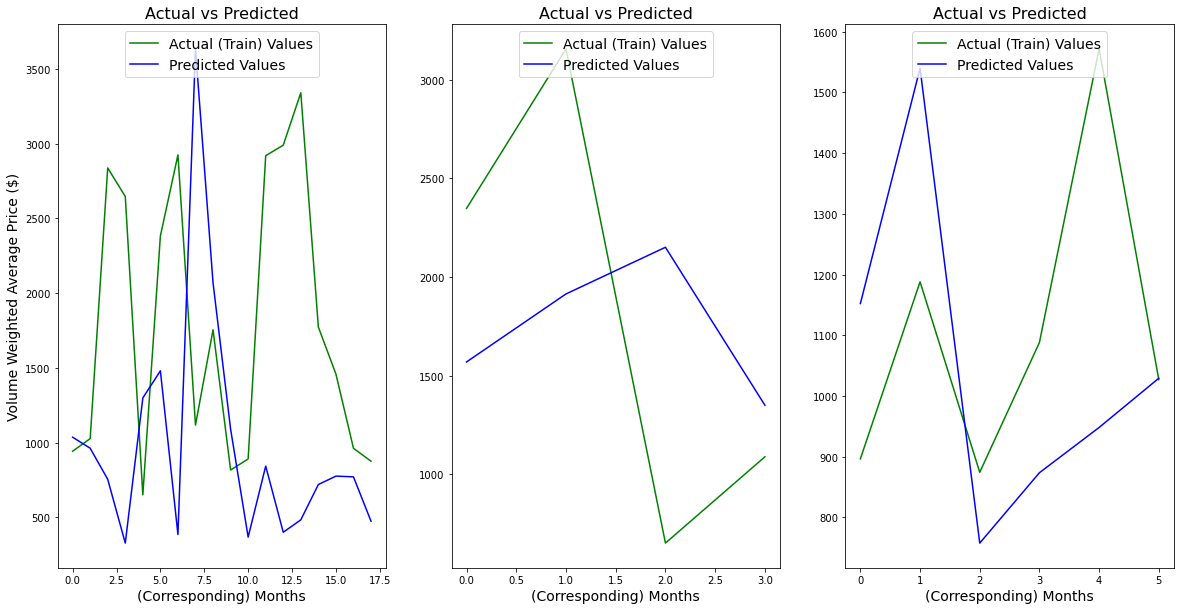

In [37]:
# creating a figure
plt.figure(figsize = (20, 10))

plt.subplot(1, 3, 1)

# plotting actual training values and predicted values
plt.plot(y_train_1, color = 'green', label = 'Actual (Train) Values')
plt.plot(train_predictions_1, color = 'blue', label = 'Predicted Values')

# labeling and naming the first sub-plot
plt.xlabel('(Corresponding) Months', fontsize = 14)
plt.ylabel('Volume Weighted Average Price ($)', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 16)

# putting a legend into the figure
plt.legend(loc='upper center',  fontsize = 14)


plt.subplot(1, 3, 2)

# plotting actual training values and predicted values
plt.plot(y_train_2, color = 'green', label = 'Actual (Train) Values')
plt.plot(train_predictions_2, color = 'blue', label = 'Predicted Values')

# labeling and naming the second sub-plot
plt.xlabel('(Corresponding) Months', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 16)

# putting a legend into the figure
plt.legend(loc='upper center',  fontsize = 14)


plt.subplot(1, 3, 3)

# plotting actual training values and predicted values
plt.plot(y_train_3, color = 'green', label = 'Actual (Train) Values')
plt.plot(train_predictions_3, color = 'blue', label = 'Predicted Values')

# labeling and naming the third sub-plot
plt.xlabel('(Corresponding) Months', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 16)

# putting a legend into the figure
plt.legend(loc='upper center', fontsize = 14)

# saving the figure
plt.savefig("Non-Linearity.png", dpi = 300)